In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data_dir="/content/drive/MyDrive/archive/Genre Classification Dataset"
train_path=data_dir+"/train_data.txt"
test_path=data_dir+"/test_data.txt"

In [ ]:
train_data=pd.read_csv(train_path,sep=":::",names=["Title","Genre","Description"],engine="python")
test_data=pd.read_csv(test_path,sep=":::",names=["Title","Description"],engine="python")

In [ ]:
train_data.head()

Title       Genre  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         Description  
1   Listening in to a conversation between his do...  
2   A brother and sister with a past incestuous r...  
3   As the bus empties the students for their fie...  
4   To help their unemployed father make ends mee...  
5   The film's title refers not only to the un-re...

In [ ]:
test_data.head()

Title  \
1          Edgar's Lunch (1998)    
2      La guerra de papá (1977)    
3   Off the Beaten Track (2010)    
4        Meu Amigo Hindu (2015)    
5             Er nu zhai (1955)    

                                         Description  
1   L.R. Brane loves his life - his car, his apar...  
2   Spain, March 1964: Quico is a very naughty ch...  
3   One year in the life of Albin and his family ...  
4   His father has died, he hasn't spoken with hi...  
5   Before he was known internationally as a mart...

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
test_data.isnull().sum()

Title          0
Description    0
dtype: int64

In [ ]:
train_data.shape

(54214, 3)

In [ ]:
test_data.shape

(54200, 2)

In [ ]:
train_data.describe()

Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12

In [ ]:
train_data.Genre.value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [ ]:
train_data.drop_duplicates(inplace = True)
test_data.drop_duplicates(inplace = True)

In [ ]:
stopwords = set(stopwords.words('english'))

In [ ]:
def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    # tokenize and convert to list
    tokens = word_tokenize(text)
    ## Lemmatize it
    lemmatizer  = WordNetLemmatizer()
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    # Remove stopwords
    text = [word for word in text if word not in stopwords]
    return " ".join(text)

In [ ]:
# we need to preprocess the description
train_data["Description"] =  train_data["Description"].apply(preprocessing)

In [ ]:
train_data['Description']

1        listening conversation doctor parents 10yearol...
2        brother sister past incestuous relationship cu...
3        bus empties students field trip museum natural...
4        help unemployed father make ends meet edith tw...
5        films title refers unrecovered bodies ground z...
                               ...                        
54210    shortlived nbc live sitcom centered bonino wor...
54211    next generation exploitation sisters kapa bay ...
54212    ze bestaan echt standup comedy growing facing ...
54213    walter vivian live country difficult time keep...
54214    labor day weekend 1935 intense hurricane ever ...
Name: Description, Length: 54214, dtype: object

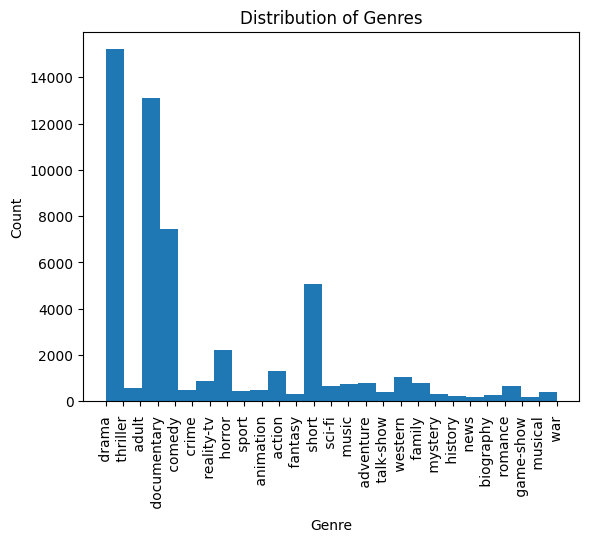

In [ ]:
plt.hist(train_data['Genre'],bins=25)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=90)
plt.show()

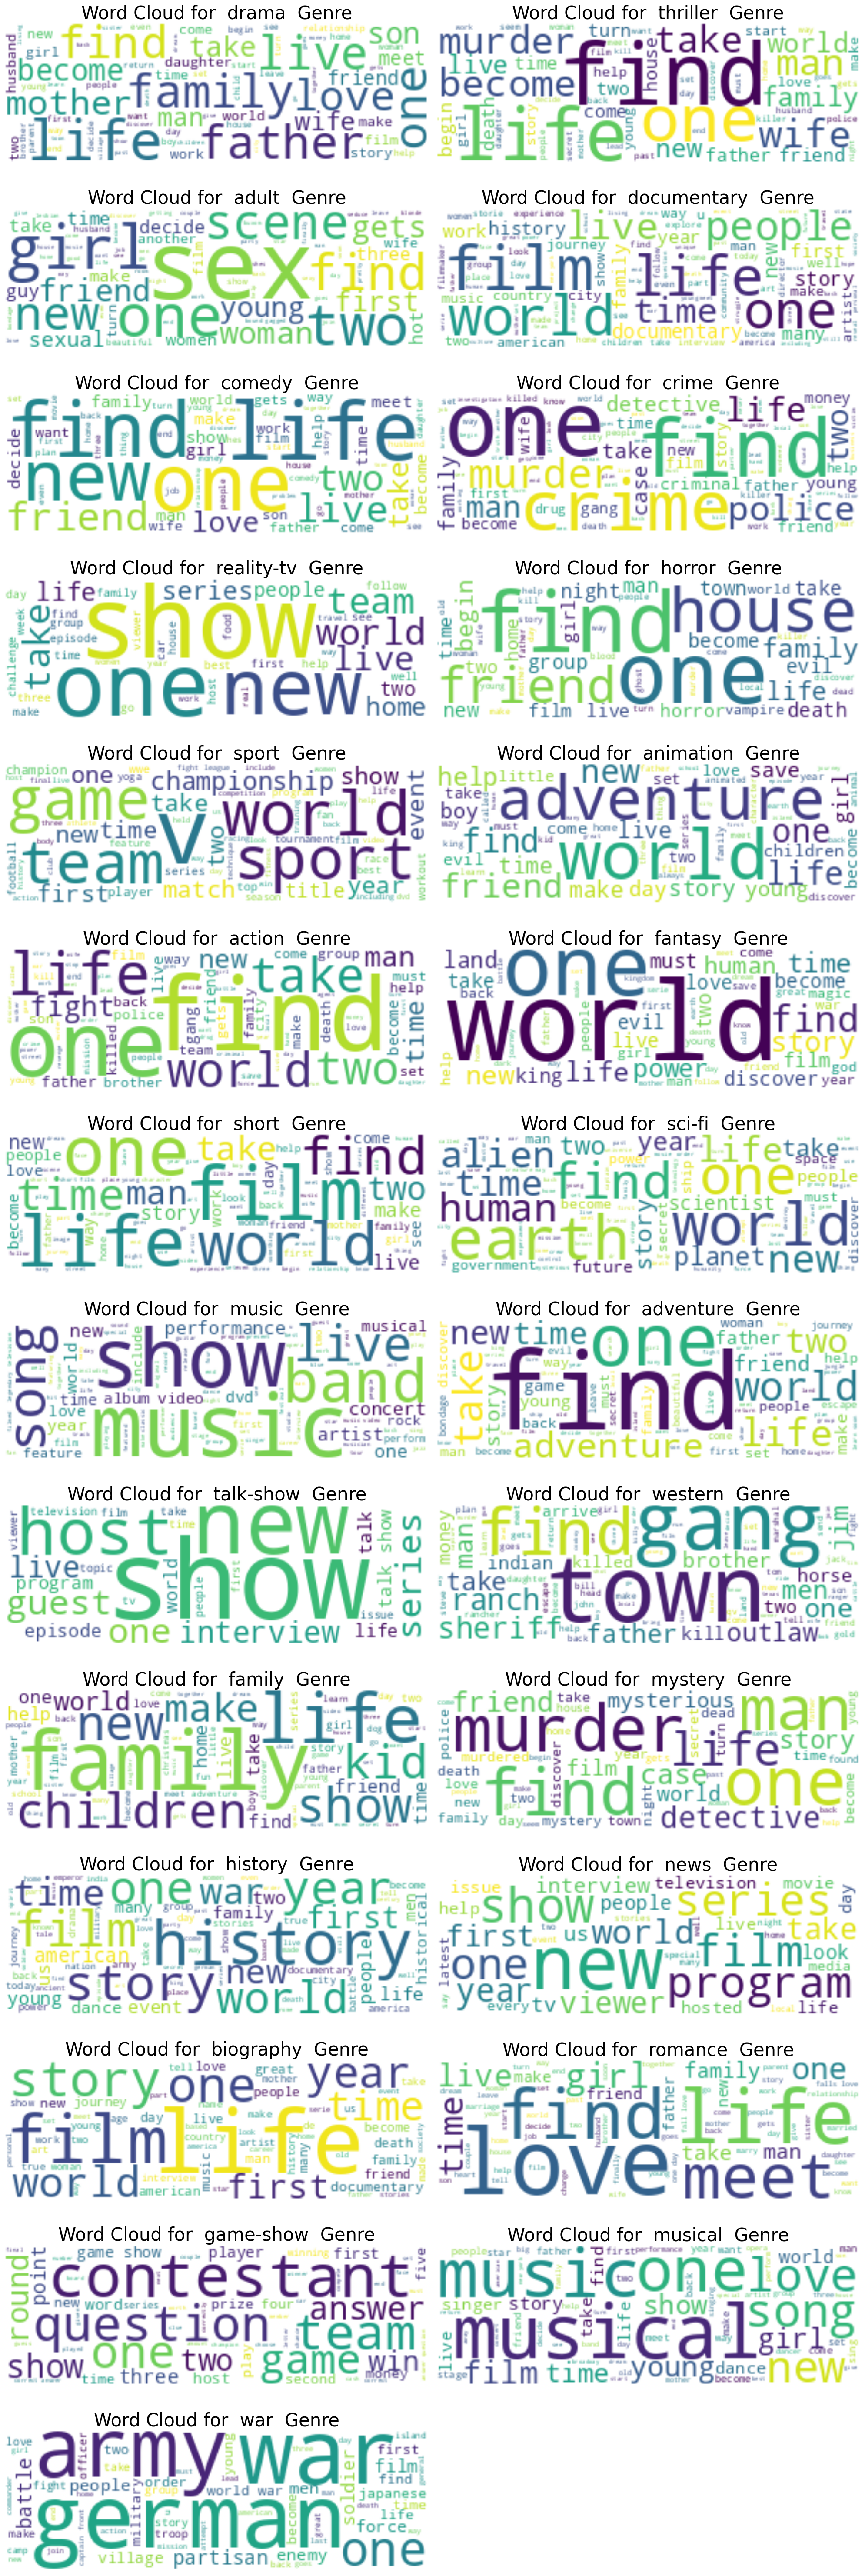

In [ ]:
genres = train_data['Genre'].unique()
plt.figure(figsize=(20, 60))
# Iterate over each genre
for i, genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)  # Assuming you have 14 rows and 2 columns for 28 genres
    text_subset = " ".join(list(train_data[train_data["Genre"] == genre]['Description']))
    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre',fontsize=30)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# removing lesser relevant feautures
train_data=train_data.drop(['Title'], axis=1)

In [ ]:
train_data.head()

Genre                                        Description
1      drama   listening conversation doctor parents 10yearol...
2   thriller   brother sister past incestuous relationship cu...
3      adult   bus empties students field trip museum natural...
4      drama   help unemployed father make ends meet edith tw...
5      drama   films title refers unrecovered bodies ground z...

In [ ]:
# converting genres to numerical data
label_encoder = LabelEncoder()
train_data['Genre_enc'] = label_encoder.fit_transform(train_data['Genre'])
class_names= list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [ ]:
train_data.head()

Genre                                        Description  Genre_enc
1      drama   listening conversation doctor parents 10yearol...          8
2   thriller   brother sister past incestuous relationship cu...         24
3      adult   bus empties students field trip museum natural...          1
4      drama   help unemployed father make ends meet edith tw...          8
5      drama   films title refers unrecovered bodies ground z...          8

In [ ]:
## Split the data
x = train_data["Description"]
y = train_data["Genre"]
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.3,random_state=4)

In [ ]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

In [ ]:
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 =  vectorize.transform(x_test)

In [ ]:
# classification using logistic regression
model = LogisticRegression()
model.fit(x_train2 ,y_train)
print("Model Score on Training data",model.score(x_train2 ,y_train))
print("Model Score on Test data",model.score(x_test2 ,y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_pred ,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data 0.9986297399140952
Model Score on Test data 0.5635413464494313
               precision    recall  f1-score   support

      action        0.31      0.40      0.35       299
       adult        0.40      0.64      0.49       110
   adventure        0.16      0.38      0.23        95
   animation        0.16      0.35      0.22        66
   biography        0.01      0.09      0.02        11
      comedy        0.59      0.53      0.56      2517
       crime        0.09      0.24      0.14        62
 documentary        0.79      0.70      0.74      4427
       drama        0.68      0.55      0.61      4996
      family        0.13      0.32      0.18       103
     fantasy        0.07      0.24      0.10        25
   game-show        0.68      0.75      0.71        55
     history        0.00      0.00      0.00         7
      horror        0.59      0.66      0.62       599
       music        0.40      0.66      0.50       141
     musical        0.06   

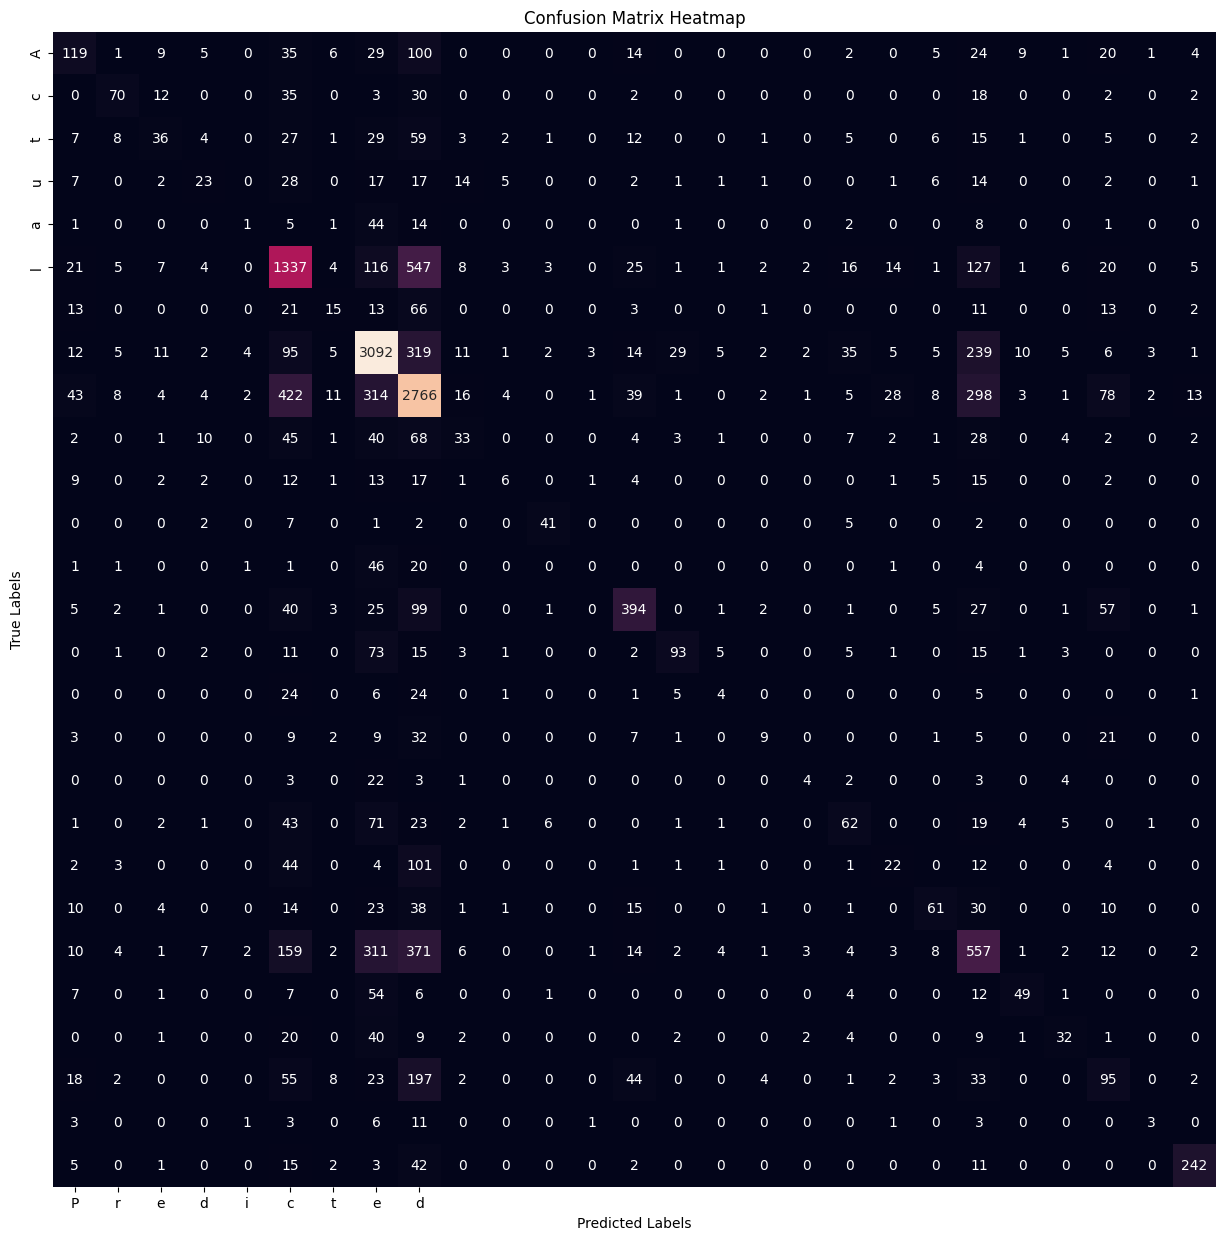

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels='Predicted', yticklabels='Actual')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
svm = LinearSVC()
svm.fit(x_train2 ,y_train)
print("Model Score on Training data",svm.score(x_train2 ,y_train))
print("Model Score on Test data",svm.score(x_test2 ,y_test))
y_pred = svm.predict(x_test2)
print(classification_report(y_pred ,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Score on Training data 0.999683786134022
Model Score on Test data 0.5168152474638795
               precision    recall  f1-score   support

      action        0.29      0.33      0.31       331
       adult        0.38      0.52      0.44       128
   adventure        0.16      0.22      0.18       157
   animation        0.16      0.23      0.19        98
   biography        0.00      0.00      0.00        28
      comedy        0.54      0.50      0.52      2450
       crime        0.11      0.17      0.14       103
 documentary        0.73      0.69      0.71      4148
       drama        0.59      0.53      0.56      4516
      family        0.13      0.22      0.16       147
     fantasy        0.11      0.16      0.13        62
   game-show        0.70      0.66      0.68        64
     history        0.01      0.06      0.02        17
      horror        0.52      0.56      0.54       624
       music        0.42      0.56      0.48       171
     musical        0.08    

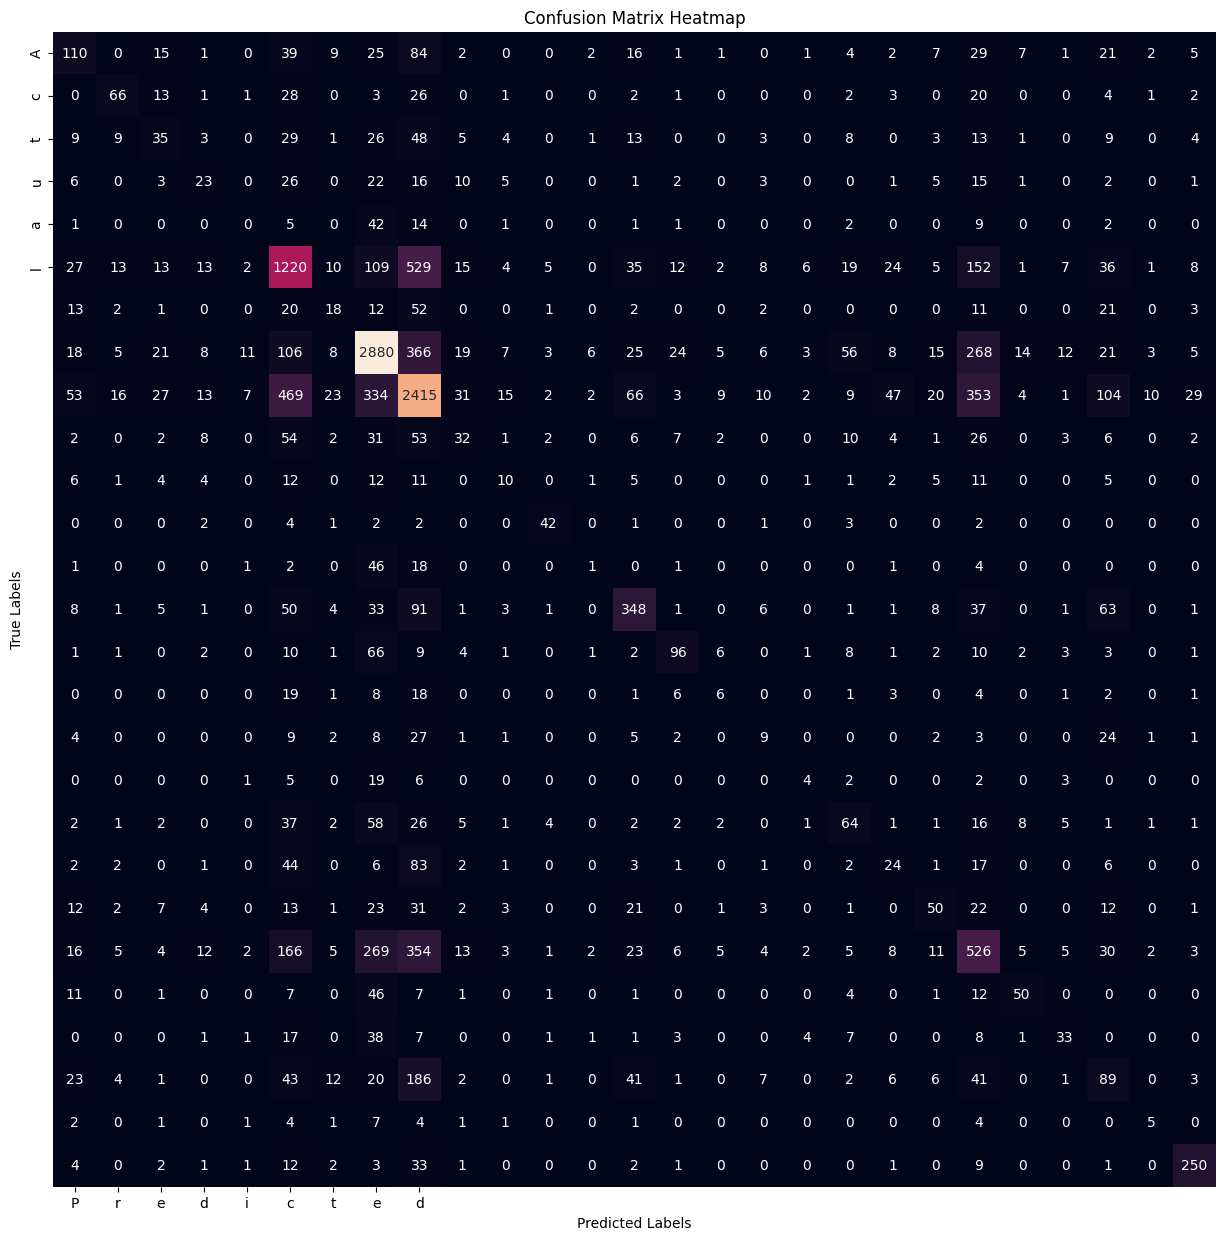

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels='Predicted', yticklabels='Actual')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()